<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%97%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%81%D1%82%D0%B2%D0%BE_%D1%81_%D1%84%D1%80%D0%B5%D0%B9%D0%BC%D0%B2%D0%BE%D1%80%D0%BA%D0%BE%D0%BC_PyTorch_%D0%A0%D0%B0%D0%B7%D0%B1%D0%BE%D1%80_%D0%B4_%D0%B7__old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

# Знакомство с фреймворком PyTorch. - Разбор д.з.

# Домашнее задание

## Задание 1
Напишите модель автокодировщика для датасета рукописных цифр MNIST (или для любой из баз, представленных в torchvision)

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

In [ ]:
trainDataset = torchvision.datasets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


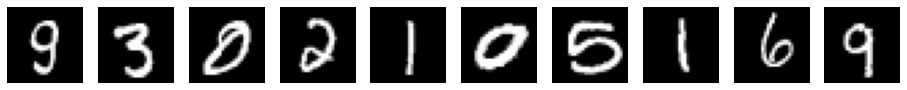

In [ ]:
figure = plt.figure(figsize=(16, 3))
cols, rows = 10, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainDataset), size=(1,)).item()
    img, label = trainDataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    # plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")

In [ ]:
batchSize = 100
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, batch_size=batchSize, shuffle=True) 
len(trainDataset), len(trainLoader)

(60000, 600)

In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim=8):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, latent_dim)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

encoder = Encoder()
# encoder.cuda()

In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dim=8):
        super(Decoder, self).__init__()
        self.latent_dim = latent_dim
        self.layer1 = nn.Sequential(
            nn.ConvTranspose2d(32, 32, kernel_size=2, stride=2, padding=0),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.layer2 = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=2, stride=2, padding=0),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )
        self.fc = nn.Linear(self.latent_dim, 7*7*32)

    def forward(self, x):
        out = self.fc(x)
        out = out.view(x.size(0), 32, 7, 7)
        out = self.layer1(out)
        out = self.layer2(out)
        
        return out

decoder = Decoder()

In [ ]:
encoder

Encoder(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=1568, out_features=8,

## Задание 2
Создайте свой набор данных (экземпляр класса `torch.utils.data.Dataset`) и загрузчик данных `torch.utils.data.DataLoader`. Образцы будут точками в квадрате единичного размера. Другими словами, образец данных - пара случайных чисел [x0, x1], равномерно распределенных на отрезке [0, 1]. Разбейте точки на 3 класса: 
* Точка принадлежит классу 0, если ее расстояние от точки координатами [0.6, 0.6] меньше 0.3.
* Точка принадлежит классу 1, если не входит в класс 0 и ее расстояние от точки [0.4, 0.4] менее 0.5
* Все остальные точки принадлежат классу 2

Обучающий набор должен содержать 50000 точек, тестовый - 10000.

(Такой же набор создавался средствами TensorFlow в предыдущем уроке)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import numpy as np

In [ ]:
class MyDataset(Dataset):
    def __init__(self, n=10000, X=torch.tensor([[0.6, 0.6], [0.4, 0.4]]), R=[0.3, 0.5]):
        self.n = n
        self.X = X
        self.R = R
        self.x_data = torch.rand((n, 2), dtype=torch.float32)
        self.y_data = torch.zeros((n,), dtype=torch.int64)
        for i in range(n): 
            if (self.x_data[i, 0] - X[0, 0])**2 + (self.x_data[i, 1] - X[0, 1])**2 < R[0]**2:
                self.y_data[i] = 0
            elif (self.x_data[i, 0] - X[1, 0])**2 + (self.x_data[i, 1] - X[1, 1])**2 < R[1]**2:
                self.y_data[i] = 1
            else:
                self.y_data[i] = 2

    def __len__(self):
        return self.n

    def __getitem__(self, idx):
        return self.x_data[idx], self.y_data[idx]


In [ ]:
train_data = MyDataset(50000)
test_data = MyDataset(10000)

In [ ]:
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100)

## Задание 3
Создайте модель для классификации точек из предыдущего задания. Используйте ту же архитектуру, которая была в уроке по TensorFlow. Обучите модель с теми же гиперпараметрами, сравните результат.

In [ ]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = MyModel()
model

MyModel(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)

In [ ]:
epochs = 10
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    losses, val_losses = [], []
    for x, y in train_loader:
        optimizer.zero_grad()
        logits = model(x)
        loss = criterion(logits, y)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
    avg_loss = np.array(losses).mean()
    
    for x, y in test_loader:
        y_prob = model(x)
        loss = criterion(y_prob, y)
        val_losses.append(loss.item())
    avg_val_loss = np.array(val_losses).mean()

    print("Epoch %d/%d, loss %.4f, val_loss %.4f" % 
          (epoch+1, epochs, avg_loss, avg_val_loss))

Epoch 1/10, loss 0.3619, val_loss 0.1486
Epoch 2/10, loss 0.1142, val_loss 0.1039
Epoch 3/10, loss 0.0848, val_loss 0.0975
Epoch 4/10, loss 0.0742, val_loss 0.1135
Epoch 5/10, loss 0.0638, val_loss 0.0559
Epoch 6/10, loss 0.0658, val_loss 0.0627
Epoch 7/10, loss 0.0619, val_loss 0.0581
Epoch 8/10, loss 0.0545, val_loss 0.0540
Epoch 9/10, loss 0.0567, val_loss 0.0416
Epoch 10/10, loss 0.0535, val_loss 0.1009


In [ ]:
test_loader = DataLoader(test_data, batch_size=100)
x_test, y_pred = [], []
for x_, _ in test_loader:
    pred = np.argmax(model(x_).detach(), axis=1)
    x_test.extend(x_.numpy())
    y_pred.extend(pred)
x_test = np.array(x_test)
y_pred = np.array(y_pred)

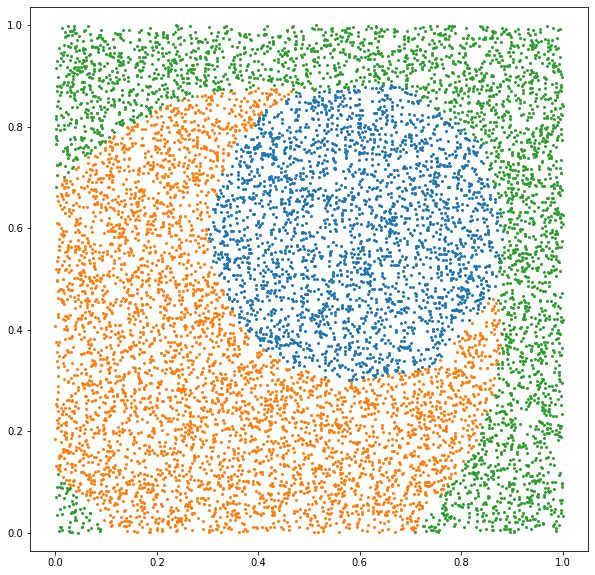

In [ ]:
x0 = x_test[y_pred == 0]
x1 = x_test[y_pred == 1]
x2 = x_test[y_pred == 2]
plt.figure(figsize=(10, 10))
plt.plot(x0[:,0], x0[:,1], 'o', markersize=2 )
plt.plot(x1[:,0], x1[:,1], 'o', markersize=2 )
plt.plot(x2[:,0], x2[:,1], 'o', markersize=2 )
plt.axis('equal');

# Part 2 Предобученные модели

# Перенос стиля

Мы реализуем алгоритм [Neural-Style](https://arxiv.org/abs/1508.06576),  разработанный Леоном А. Гэтисом, Александром С. Эккером и Матиасом Бетге. 

Алгоритм Neural-Style, или Neural-Transfer воспроизводить картины в новом художественном стиле. 

Алгоритм берет исходное изображение и изображение-стиль, и изменяет исходное изображение таким образом, что сохраняется его контент, а художественный стиль переносится из изображения-стиля.

### Основной принцип 

Мы определяем два расстояния, одно для контента. ($ D_C $) и одно для стиля ($ D_S $). $ D_C $ измеряет, насколько различается контент между двумя изображениями, а $ D_S $ измеряет, насколько отличается стиль между двумя изображениями. 

Затем мы берем третье изображение и преобразовываем его так, чтобы минимизировать его content-расстояние от content-изображения и его style-расстояние от style-изображения. 

Импорт пакетов и выбор устройства
---------------------------------

-  ``torch``, ``torch.nn``, ``numpy`` (indispensables packages for
   neural networks with PyTorch)
-  ``torch.optim`` (efficient gradient descents)
-  ``PIL``, ``PIL.Image``, ``matplotlib.pyplot`` (load and display
   images)
-  ``torchvision.transforms`` (transform PIL images into tensors)
-  ``torchvision.models`` (train or load pre-trained models)
-  ``copy`` (to deep copy the models; system package)


In [ ]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

Нужно выбрать, на каком устройстве будет работать сеть, и импортировать контент и стиль изображения. Запуск алгоритма нейронной передачи на больших изображениях занимает много времени и будет выполняться намного быстрее при работе на графическом процессоре. Мы можем использовать `torch.cuda.is_available()`, чтобы определить, доступен ли графический процессор. Затем мы настраиваем `torch.device` для использования. Метод `.to(device)` используется для перемещения тензоров или модулей на желаемое устройство.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Загрузка изображений 
Импортируем изображения стиля и содержимого. Исходные изображения PIL имеют значения от 0 до 255, но при преобразовании в pytorch-тензоры их значения преобразуются в значения от 0 до 1. Размер изображений также необходимо изменить, чтобы они имели одинаковые размеры. 

Следует отметить важную деталь: нейронные сети из библиотеки torch обучаются с использованием значений тензора от 0 до 1. В нормировке 0..255 сеть не будет работать.


In [ ]:
!wget http://dataudt.ru/datasets/picasso.jpg http://dataudt.ru/datasets/dancing.jpg

--2021-06-21 01:44:40--  http://dataudt.ru/datasets/picasso.jpg
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114573 (112K) [image/jpeg]
Saving to: ‘picasso.jpg’

picasso.jpg         100%[===================>] 111.89K   226KB/s    in 0.5s    

2021-06-21 01:44:41 (226 KB/s) - ‘picasso.jpg’ saved [114573/114573]

--2021-06-21 01:44:41--  http://dataudt.ru/datasets/dancing.jpg
Reusing existing connection to dataudt.ru:80.
HTTP request sent, awaiting response... 200 OK
Length: 40484 (40K) [image/jpeg]
Saving to: ‘dancing.jpg’

dancing.jpg         100%[===================>]  39.54K  --.-KB/s    in 0s      

2021-06-21 01:44:41 (508 MB/s) - ‘dancing.jpg’ saved [40484/40484]

FINISHED --2021-06-21 01:44:41--
Total wall clock time: 1.4s
Downloaded: 2 files, 151K in 0.5s (306 KB/s)


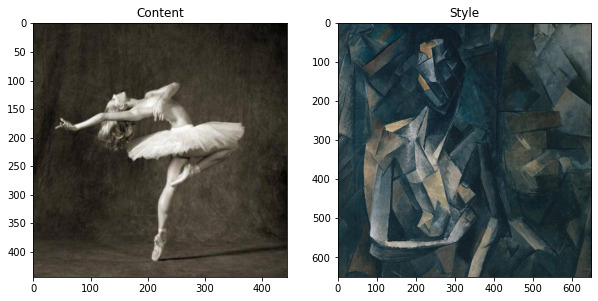

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
img = Image.open("dancing.jpg")
plt.imshow(img)
plt.title('Content')
plt.subplot(1,2,2)
img = Image.open("picasso.jpg")
plt.imshow(img)
plt.title('Style');

Загрузим эти изображения в виде тензоров и поместим их на GPU

In [ ]:
# Желаемый размер изображений
imsize = 512 if torch.cuda.is_available() else 128  # изображение берём меньше, если обучаем не на CPU

loader = transforms.Compose([
    transforms.Resize(imsize),  # изменили размер импортируемого изображения
    transforms.ToTensor()])  # преобразовали его в torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # добавляем дополнительную размерность, для ввода в сеть
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

style_img = image_loader("picasso.jpg")
content_img = image_loader("dancing.jpg")

assert style_img.size() == content_img.size(), "изображения контента и стиля должны иметь одинаковые размеры"

Теперь давайте создадим функцию, которая отображает изображение, повторно конвертируя его копию в формат PIL и отображая копию с помощью plt.imshow. Мы попытаемся отобразить содержимое и стили изображения, чтобы убедиться, что они были импортированы правильно.

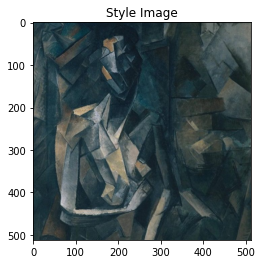

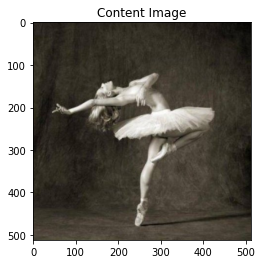

In [ ]:
unloader = transforms.ToPILImage()  # конвертируем в массив PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # клонируем тензор, чтобы оставить его неизменным
    image = image.squeeze(0)      # удаляем лишнюю размерность
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # вводим паузу, чтобы картинки успевали отрисовываться


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

### Функции потерь

**Потеря контента**

Потеря контента - это функция, которая представляет собой взвешенное расстояние между контентом и содержимым для отдельного слоя. 

Мы реализуем вычисление потери контента как слой сети, пропускающий без изменения свой вход на выход. Поместим этот слой (модуль) потери контента сразу после сверточных слоев, которые используются для вычисления расстояния между содержимым. Таким образом, каждый раз, когда в сеть подается входное изображение, потери контента будут вычисляется на желаемых слоях. Чтобы сделать слой потери контента "прозрачным", мы должны определить метод `forward`, который вычисляет content loss, а затем возвращает входные данные слоя. Вычисленная потеря сохраняется как свойство модуля `self.loss`.



In [ ]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super().__init__()
        # отделяем целевой контент от используемого дерева
        # для динамического вычисления градиента: это неизменное значение,
        # не переменная. В противном случае forward метод в criterion
        # выдаст ошибку.

        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

**Потеря стиля**
Модуль реализован аналогично модулю потери контента. Он будет действовать как прозрачный слой в сети, которая вычисляет потерю стиля этого слоя. Чтобы вычислить потерю стиля, нам нужно вычислить матрицу грамма $ G_ {XL} $. Матрица Грамма- это результат умножения заданной матрицы на ее транспонированную матрицу. 

Матрица Грамма должна быть нормализована путем деления каждого элемента на общее количество элементов в матрице. Особенности стиля, как правило, находятся в более глубоких слоях сети, поэтому эта нормализация имеет большое значение.


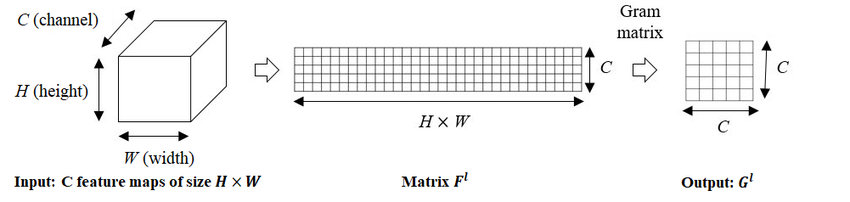

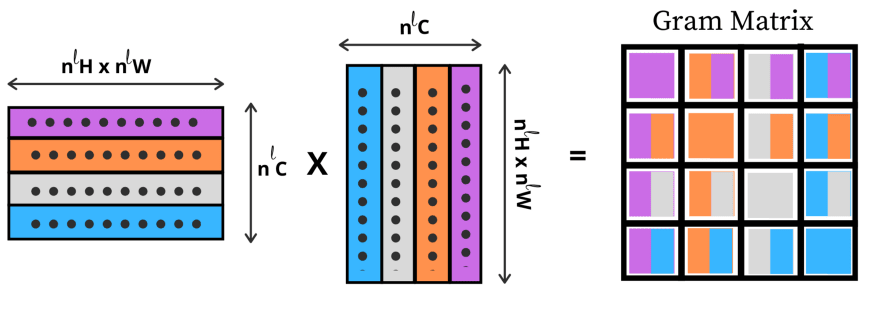

In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()  # a=batch size(=1)
    # b = количество карт признаков
    # (c,d) = размерности карт признаков f. map (N=c*d)

    features = input.view(a * b, c * d)  # изменяем размерность F_XL 

    G = torch.mm(features, features.t())  # вычисляем матрицу Грама

    # "нормализуем" значения в матрице Грама
    # путём деления на число элементов в каждой карте признаков.
    return G.div(a * b * c * d)

Теперь модуль потери стиля выглядит почти так же, как модуль потери контента. Расстояние стиля также вычисляется с использованием среднеквадратичной ошибки между $G_{XL}$ и $G_{SL}$.

In [ ]:
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super().__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

### Импорт модели 
Теперь нам нужно импортировать предварительно обученную нейронную сеть. Мы будем использовать 19-слойную сеть VGG19. Реализация VGG19 в PyTorch представляет собой модуль, разделенный на два дочерних последовательных модуля: фичи (features) (содержащие слои свертки и объединения) и классификатор (содержащий полносвязные слои). Мы будем использовать модуль фич, потому что нам нужны выходные данные отдельных слоев свертки для измерения потерь контента и стиля. 

Некоторые слои (например Dropout) во время обучения ведут себя иначе, чем при оценке, поэтому мы должны установить сеть в режим оценки с помощью `.eval()`.

In [ ]:
cnn = models.vgg19(pretrained=True).features.to(device).eval()

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


Кроме того, сети VGG обучаются на изображениях с каждым каналом, нормализованным по среднему значению = [0,485, 0,456, 0,406] и std = [0,229, 0,224, 0,225]. Мы будем использовать их для нормализации изображения перед отправкой в ​​сеть.

In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# создаём модуль нормализации входных массивов изображений, чтобы подать их в
# nn.Sequential
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # с помощью .view преобразуем mean и std к размерам [C x 1 x 1] чтобы можно было
        # работать напрямую с тензором изображения размерами [B x C x H x W], где
        # B - batch size. C - число каналов. H - высота, W - ширина.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # нормализуем картинку
        return (img - self.mean) / self.std

Модуль `Sequential` содержит упорядоченный список дочерних модулей. Например, `vgg19.features` содержит последовательность (Conv2d, ReLU, MaxPool2d, Conv2d, ReLU…), вызываемых в правильном порядке. Нам нужно добавить наши слои потери контента и потери стиля сразу после слоя свертки, который они обслуживают. Для этого мы должны создать новый модуль Sequential, в который правильно вставлены модули потери содержимого и потери стиля. 

In [ ]:
# определяем слои для расчёта потерь стиля/контента(содержания) :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

# Пересобираем модель, добавляя свои слои и отбрасывая последние, не нужные слои исходной модели.
# На выходе - пересобранная модель и 2 списка потерь.
def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    cnn = copy.deepcopy(cnn)

    # модуль нормализации
    normalization = Normalization(normalization_mean, normalization_std).to(device)

    # это чтобы иметь итерабельный доступ к списку потерь стиля/контента(содержания)
    style_losses = []
    content_losses = []

    # зная что свёрточная сеть nn.Sequential, создаём новую nn.Sequential
    # чтобы вложить в неё модули, активируемые последовательно
    model = nn.Sequential(normalization)

    i = 0  # увеличиваем каждый раз, как встречаем свёрточный слой conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # Версия in-place не очень хорошо взаимодействует с ContentLoss
            # и StyleLoss, которые мы вводим ниже. Заменяем на out-of-place
            layer = nn.ReLU(inplace=False) # inplace=True модифицирует сам вход
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        # Добавляем наши слои потерь после выбранных слоев
        if name in content_layers:
            # добавляем loss контента:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # добавляем loss стиля:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # отбрасываем все слои после последнего слоя content loss или style loss - они нам не нужны.
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

Посмотрим, какая получилась модель:

In [ ]:
model, style_losses, content_losses = get_style_model_and_losses(cnn,
        cnn_normalization_mean, cnn_normalization_std, style_img, content_img)
model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_1): StyleLoss()
  (relu_1): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_2): StyleLoss()
  (relu_2): ReLU()
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_3): StyleLoss()
  (relu_3): ReLU()
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (content_loss_4): ContentLoss()
  (style_loss_4): StyleLoss()
  (relu_4): ReLU()
  (pool_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_5): StyleLoss()
)

Далее выбираем входное изображение. Можно использовать копию изображения содержимого или белый шум.

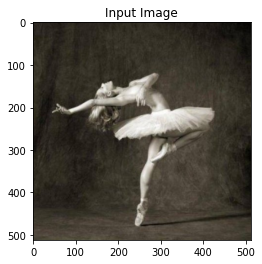

In [ ]:
input_img = content_img.clone()
# для использования белого шума в качестве начального изображения раскоментируйте строку ниже:
# input_img = torch.randn(content_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')

###Градиентный спуск 
Как предложил Леон Гэтис, автор алгоритма, [здесь](https://discuss.pytorch.org/t/pytorch-tutorial-for-neural-transfert-of-artistic-style/336/20?u=alexis-jacq), мы будем использовать алгоритм L-BFGS для запуска нашего градиентного спуска. 

В отличие от обучения сети, мы хотим обучить входное изображение, чтобы минимизировать потери контента / стиля. Мы создадим оптимизатор PyTorch L-BFGS optim.LBFGS и передадим ему наше изображение в качестве тензора для оптимизации.

In [ ]:
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.LBFGS([input_img.requires_grad_()])
    return optimizer

Наконец, мы должны определить функцию, которая выполнит перенос стиля. Для каждой итерации она получает обновленные входные данные и вычисляет новые потери. Мы запустим методы `backward` каждого модуля потерь, чтобы динамически вычислить градиенты. Оптимизатор использует функцию-замыкание, которая вычисляет и возвращает потерю. 

Есть еще одна проблема, которую необходимо решить. В результате применения градиентов данные изображения могут выйти за допустимые границы от 0 до 1. Мы решим эту проблему, исправляя входные значения от 0 до 1 при каждом запуске сети.

In [ ]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)
    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # обрезаем данные, вышедшие за пределы от 0 до 1
            input_img.data.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # финальная корректировка...
    input_img.data.clamp_(0, 1)

    return input_img

Наконец, запускаем алгоритм:

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 4.095206 Content Loss: 4.225299

run [100]:
Style Loss : 1.109285 Content Loss: 3.018476

run [150]:
Style Loss : 0.704774 Content Loss: 2.651623

run [200]:
Style Loss : 0.470550 Content Loss: 2.495179

run [250]:
Style Loss : 0.342252 Content Loss: 2.409523

run [300]:
Style Loss : 0.261363 Content Loss: 2.355501



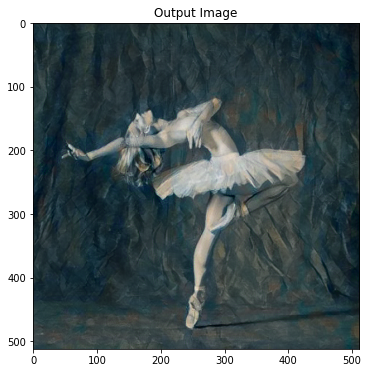

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure(figsize=(6, 6))
imshow(output, title='Output Image')
plt.ioff()
plt.show()

# Домашнее задание

Перед выполнением задания оставляем и выполняем ячейки с сетью переноса стиля из ноутбука занятия.

Возьмите нейронную сеть по переносу стиля. Выполните следующие задания:

## Задание 1
Попробуйте начать с белого шума вместо изображения контента. 

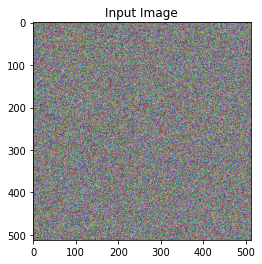

In [ ]:
# input_img = content_img.clone()
# для использования белого шума в качестве начального изображения раскоментируйте строку ниже:
input_img = torch.randn(content_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 85.313995 Content Loss: 11.850805

run [100]:
Style Loss : 24.581337 Content Loss: 9.520652

run [150]:
Style Loss : 5.454732 Content Loss: 7.560128

run [200]:
Style Loss : 2.013436 Content Loss: 5.910428

run [250]:
Style Loss : 1.313734 Content Loss: 4.849993

run [300]:
Style Loss : 0.985519 Content Loss: 4.224133

run [350]:
Style Loss : 0.762543 Content Loss: 3.793127

run [400]:
Style Loss : 0.587326 Content Loss: 3.483163

run [450]:
Style Loss : 0.459063 Content Loss: 3.247888

run [500]:
Style Loss : 0.362911 Content Loss: 3.061864

run [550]:
Style Loss : 0.297694 Content Loss: 2.916038

run [600]:
Style Loss : 0.256244 Content Loss: 2.803594

run [650]:
Style Loss : 0.225468 Content Loss: 2.711081

run [700]:
Style Loss : 0.200149 Content Loss: 2.634757

run [750]:
Style Loss : 0.183110 Content Loss: 2.572726

run [800]:
Style Loss : 0.169791 Content Loss: 2.517773

run [850]:
Style Loss : 0.160139 Content Loss: 2.474262

run [900]:
Style Loss : 0.152

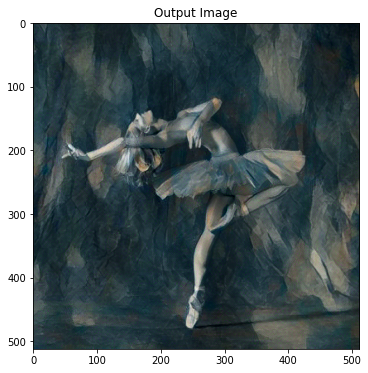

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=1000)

plt.figure(figsize=(6, 6))
imshow(output, title='Output Image')
plt.ioff()
plt.show()

## Задание 2
Замените алгоритм оптимизатора на Adam. Подберите подходящий learning rate.

In [ ]:
def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    optimizer = optim.Adam([input_img.requires_grad_()], lr=0.01)
    return optimizer

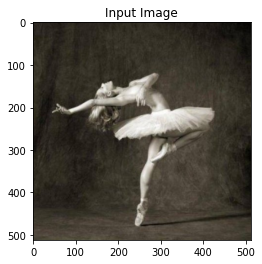

In [ ]:
input_img = content_img.clone()
# для использования белого шума в качестве начального изображения раскоментируйте строку ниже:
# input_img = torch.randn(content_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 27.978592 Content Loss: 5.279370

run [100]:
Style Loss : 2.356438 Content Loss: 4.106948

run [150]:
Style Loss : 1.556422 Content Loss: 3.417619

run [200]:
Style Loss : 1.228340 Content Loss: 3.083950

run [250]:
Style Loss : 1.091344 Content Loss: 2.903333

run [300]:
Style Loss : 0.958863 Content Loss: 2.786625



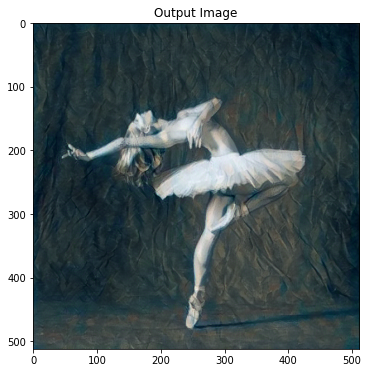

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure(figsize=(6, 6))
imshow(output, title='Output Image')
plt.ioff()
plt.show()

## Задание 3
Выведите (графически) матрицы Грамма после 2-го сверточного слоя для контента и стиля. Сравните их визуально. Чем определяется размерность матрицы Грамма?

In [ ]:
model, _, _ = get_style_model_and_losses(cnn, cnn_normalization_mean, cnn_normalization_std, style_img, content_img)
model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_1): StyleLoss()
  (relu_1): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_2): StyleLoss()
  (relu_2): ReLU()
  (pool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_3): StyleLoss()
  (relu_3): ReLU()
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (content_loss_4): ContentLoss()
  (style_loss_4): StyleLoss()
  (relu_4): ReLU()
  (pool_4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_5): StyleLoss()
)

In [ ]:
# отбрасываем все слои после интересующего нас слоя
model = model[:5]
model

Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_loss_1): StyleLoss()
  (relu_1): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [ ]:
out = model(content_img)
g_m = gram_matrix(out).detach().to('cpu')
out = model(style_img)
g_m2 = gram_matrix(out).detach().to('cpu')
out.shape, g_m.shape, g_m.min(), g_m.max()

(torch.Size([1, 64, 512, 512]),
 torch.Size([64, 64]),
 tensor(-0.0353),
 tensor(0.0974))

Размерность матрицы Грамма равна числу признаков (фич) в слое

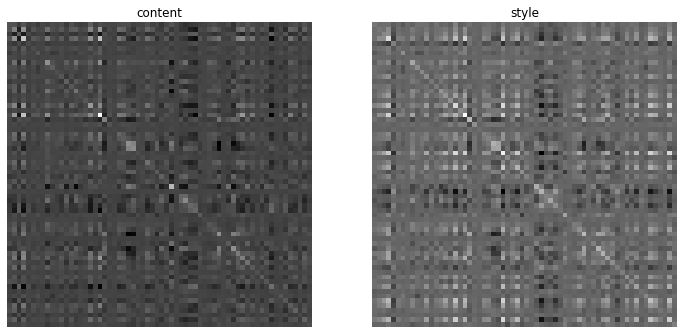

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(g_m, cmap='gray')
plt.axis('off')
plt.title('content')
plt.subplot(122)
plt.imshow(g_m2, cmap='gray')
plt.title('style')
plt.axis('off');

## Задание 4
Поэкспериментируйте с другими изображениями контента и стиля.

In [ ]:
!wget http://dataudt.ru/datasets/Parakeet.jpg http://dataudt.ru/datasets/Style.jpg http://dataudt.ru/datasets/Style1.jpg

--2021-06-21 01:47:25--  http://dataudt.ru/datasets/Parakeet.jpg
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4764 (4.7K) [image/jpeg]
Saving to: ‘Parakeet.jpg’

Parakeet.jpg        100%[===================>]   4.65K  --.-KB/s    in 0s      

2021-06-21 01:47:26 (471 MB/s) - ‘Parakeet.jpg’ saved [4764/4764]

--2021-06-21 01:47:26--  http://dataudt.ru/datasets/Style.jpg
Reusing existing connection to dataudt.ru:80.
HTTP request sent, awaiting response... 200 OK
Length: 35492 (35K) [image/jpeg]
Saving to: ‘Style.jpg’

Style.jpg           100%[===================>]  34.66K  --.-KB/s    in 0.1s    

2021-06-21 01:47:26 (280 KB/s) - ‘Style.jpg’ saved [35492/35492]

--2021-06-21 01:47:26--  http://dataudt.ru/datasets/Style1.jpg
Reusing existing connection to dataudt.ru:80.
HTTP request sent, awaiting response... 200 OK
Length: 27107 (26K) [image/jpeg]
Saving to

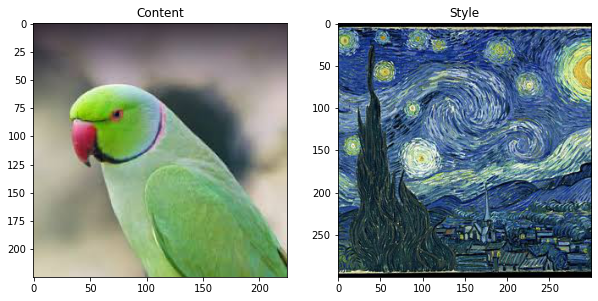

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
img = Image.open("Parakeet.jpg")
plt.imshow(img)
plt.title('Content')
plt.subplot(1,2,2)
img = Image.open("Style.jpg")
plt.imshow(img)
plt.title('Style');

In [ ]:
style_img = image_loader("Style.jpg")
content_img = image_loader("Parakeet.jpg")

assert style_img.size() == content_img.size(), "изображения контента и стиля должны иметь одинаковые размеры"

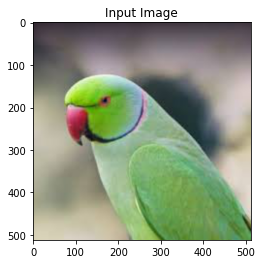

In [ ]:
input_img = content_img.clone()
# для использования белого шума в качестве начального изображения раскоментируйте строку ниже:
# input_img = torch.randn(content_img.data.size(), device=device)

plt.figure()
imshow(input_img, title='Input Image')

Building the style transfer model..
Optimizing..


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]


run [50]:
Style Loss : 637.630554 Content Loss: 19.114056

run [100]:
Style Loss : 103.830505 Content Loss: 19.111862

run [150]:
Style Loss : 66.517151 Content Loss: 19.092762

run [200]:
Style Loss : 51.928925 Content Loss: 19.078449

run [250]:
Style Loss : 43.302170 Content Loss: 19.062706

run [300]:
Style Loss : 37.370193 Content Loss: 19.043652

run [350]:
Style Loss : 32.893768 Content Loss: 19.018154

run [400]:
Style Loss : 29.305794 Content Loss: 18.987686

run [450]:
Style Loss : 26.317932 Content Loss: 18.953623

run [500]:
Style Loss : 23.767925 Content Loss: 18.915884

run [550]:
Style Loss : 21.552794 Content Loss: 18.873259

run [600]:
Style Loss : 19.605684 Content Loss: 18.827400



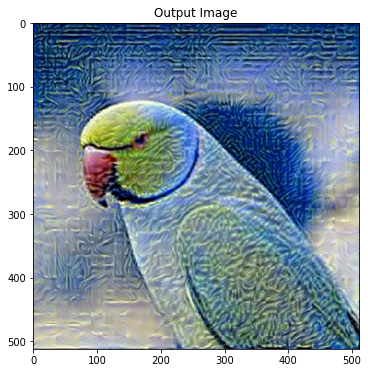

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, num_steps=600)

plt.figure(figsize=(6, 6))
imshow(output, title='Output Image')
plt.ioff()
plt.show()

#Литература

1. https://pytorch.org/docs/stable/notes/autograd.html

2. https://habr.com/ru/post/334380/

3. https://www.machinelearningmastery.ru/handwritten-digit-mnist-pytorch-977b5338e627/

4. https://overcoder.net/q/369666/%D0%BA%D0%B0%D0%BA-%D1%81%D0%B4%D0%B5%D0%BB%D0%B0%D1%82%D1%8C-%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86-%D0%B2-pytorch

5. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ion.html

6. https://discuss.pytorch.org/t/whats-the-difference-between-nn-relu-and-nn-relu-inplace-true/948

7. https://pytorch.org/docs/stable/generated/torch.unsqueeze.html

8. https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D1%80%D0%BE%D0%B9%D0%B4%D0%B5%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BB%D0%B5%D1%82%D1%87%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%93%D0%BE%D0%BB%D1%8C%D0%B4%D1%84%D0%B0%D1%80%D0%B1%D0%B0_%E2%80%94_%D0%A8%D0%B0%D0%BD%D0%BD%D0%BE

9. https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

10. https://qna.habr.com/q/701967

11. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.isinteractive.html#matplotlib.pyplot.isinteractive

12. https://habr.com/ru/company/intel/blog/170729/


#End